In [1]:
# Install RDKit. Takes 2-3 minutes
!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!time bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
!time conda install -q -y -c conda-forge rdkit

--2020-04-05 19:48:31--  https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c94f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>]  81.12M  47.6MB/s    in 1.7s    

2020-04-05 19:48:33 (47.6 MB/s) - ‘Miniconda3-latest-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h7b6447c_

In [0]:
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

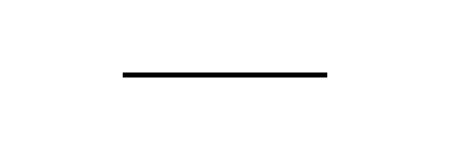

In [3]:
##using RDKit to convert text based molecules representation to actual moelecular representation
##example:
mol = Chem.MolFromSmiles('CC')
mol

In [4]:
chem_to_smile = Chem.MolToSmiles(mol)
chem_to_smile

'CC'

In [6]:
##calculating the molecular weight
mol_weight = Descriptors.MolWt(mol)
mol_weight

30.07

RDKit ERROR: [20:09:21] Explicit valence for atom # 3 Cl, 3, is greater than permitted


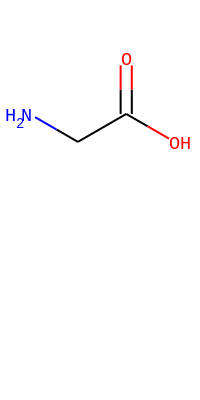

In [8]:
smiles_list = ['C(C(=O)O)N','N[C@@H](CCl=CC=CC=Cl)C(O)=O']
mol_list = []

for smiles in smiles_list:
    mol = Chem.MolFromSmiles(smiles)
    mol_list.append(mol)

img = Draw.MolsToGridImage(mol_list,molsPerRow = 1)
img

In [11]:
##we can also find patterns in the molecules. for example if we want to know if all these molecules contain N or not
pattern = Chem.MolFromSmiles('N')
for mols in mol_list:
    print(mols.HasSubstructMatch(pattern))

True


AttributeError: ignored

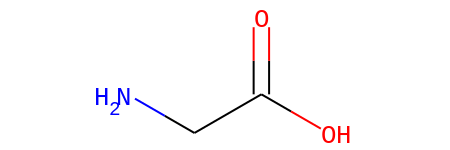

In [12]:
##fingerprints and tanimoto similarity
glycine = mol_list[0]
glycine

In [13]:
bi = {}

fp = AllChem.GetMorganFingerprintAsBitVect(glycine, 2, nBits = 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp,fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[27, 80, 147, 389, 650, 713, 807, 893, 966, 981]

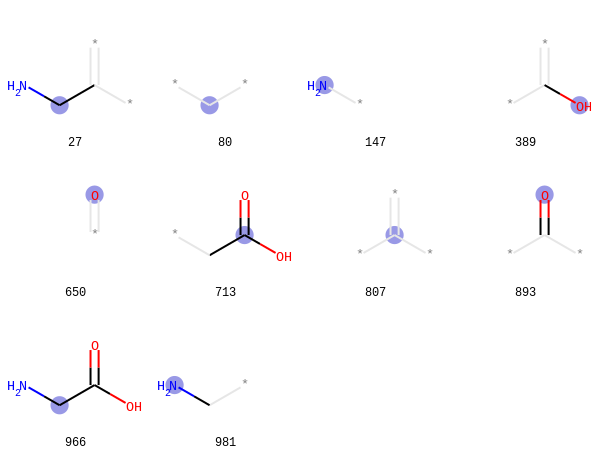

In [14]:
prints = [(glycine,x,bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow = 4, legends=[str(x) for x in fp.GetOnBits()])

In [18]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9681 sha256=96746512b084a764c4c8d0d65cc0c6e21811c17c448d710c80f53ef026d398ca
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [19]:
##RDKit and pandas 
import pandas as pd

#%%bash
!wget https://raw.githubusercontent.com/deepchem/deepchem/master/datasets/delaney-processed.csv

ERROR! Session/line number was not unique in database. History logging moved to new session 61
--2020-04-05 20:38:51--  https://raw.githubusercontent.com/deepchem/deepchem/master/datasets/delaney-processed.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 96699 (94K) [text/plain]
Saving to: ‘delaney-processed.csv’

delaney-processed.c 100%[===================>]  94.43K  --.-KB/s    in 0.002s  

2020-04-05 20:38:52 (58.8 MB/s) - ‘delaney-processed.csv’ saved [96699/96699]



In [22]:
data = pd.read_csv('delaney-processed.csv')[['Compound ID', 'smiles', 'measured log solubility in mols per litre']]
data.head()

,Compound ID,smiles,measured log solubility in mols per litre
0,Amigdalin,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,-0.77
1,Fenfuram,Cc1occc1C(=O)Nc2ccccc2,-3.30
2,citral,CC(C)=CCCC(C)=CC(=O),-2.06
3,Picene,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,-7.87
4,Thiophene,c1ccsc1,-1.33


,Compound ID,smiles,measured log solubility in mols per litre,Molecule
0,Amigdalin,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,-0.77,
1,Fenfuram,Cc1occc1C(=O)Nc2ccccc2,-3.30,
2,citral,CC(C)=CCCC(C)=CC(=O),-2.06,
3,Picene,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,-7.87,
4,Thiophene,c1ccsc1,-1.33,

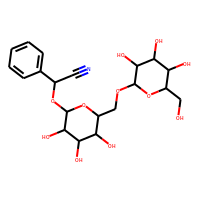
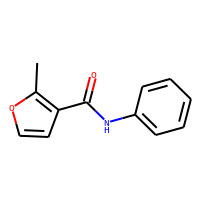
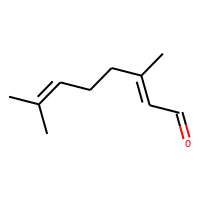
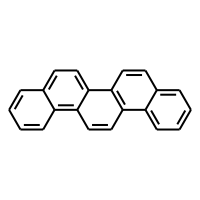
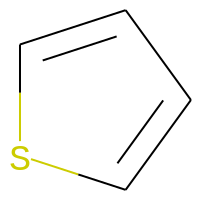

In [23]:
from rdkit.Chem import PandasTools
PandasTools.AddMoleculeColumnToFrame(data,'smiles','Molecule')
data.head()

,Compound ID,smiles,measured log solubility in mols per litre,Molecule
603,"2,2',3,3',4,4',5,5',6,6'-PCB",Clc1c(Cl)c(Cl)c(c(Cl)c1Cl)c2c(Cl)c(Cl)c(Cl)c(C...,-11.600,
718,Coronene,c1cc2ccc3ccc4ccc5ccc6ccc1c7c2c3c4c5c67,-9.332,
297,"2,2',3,3',4,4',5,5'-PCB",Clc1cc(c(Cl)c(Cl)c1Cl)c2cc(Cl)c(Cl)c(Cl)c2Cl,-9.160,
60,"2,2',3,3',5,5',6,6'-PCB",Clc1cc(Cl)c(Cl)c(c1Cl)c2c(Cl)c(Cl)cc(Cl)c2Cl,-9.150,
676,Benzo[ghi]perylene,c1cc2ccc3ccc4ccc5cccc6c(c1)c2c3c4c56,-9.018,

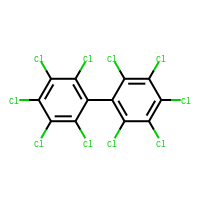
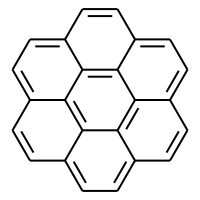
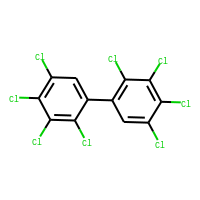
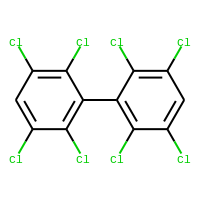
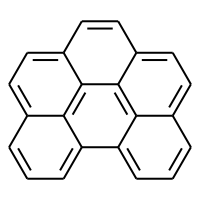

In [24]:
data.sort_values(by=['measured log solubility in mols per litre']).head()

,Compound ID,smiles,measured log solubility in mols per litre,Molecule,molecule_weight
0,Amigdalin,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,-0.77,,457.432
1,Fenfuram,Cc1occc1C(=O)Nc2ccccc2,-3.30,,201.225
2,citral,CC(C)=CCCC(C)=CC(=O),-2.06,,152.237
3,Picene,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,-7.87,,278.354
4,Thiophene,c1ccsc1,-1.33,,84.143

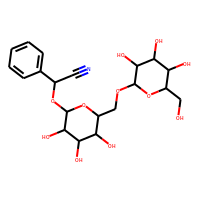
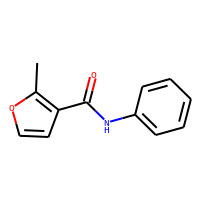
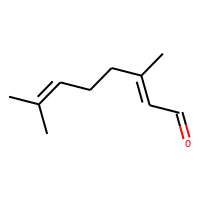
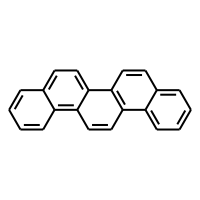
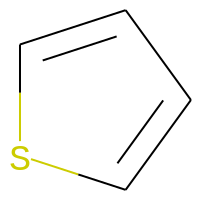

In [25]:
##molecules based on moleculare weight
data['molecule_weight'] = [Descriptors.MolWt(mol) for mol in data['Molecule']]
data.head()